Name: Hatim Sawai  
UID: 2021300108  
Batch: A  

## <p style="text-align:center;font-weight:500;">Experiment 1</p>
Aim:  
1. Install NLTK and perform basic Corpus analysis using NLTK such as frequency
distribution  
2. Learn about morphological features of a word by analysing it.  

### 1. Installig NLTK and downloading the required corpus

In [39]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from prettytable import PrettyTable

In [2]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hatim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hatim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hatim\AppData\Roaming\nltk_data...


True

### 2. Morphological analysis of a words

In [25]:
pos_mapping = {
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Adjective, comparative",
    "JJS": "Adjective, superlative",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "noun, singular or mass",
    "NNS": "noun, plural",
    "NNP": "Proper noun, singular",
    "NNPS": "Proper noun, plural",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal pronoun",
    "PRP$": "Possessive pronoun",
    "RB": "Adverb",
    "RBR": "Adverb, comparative",
    "RBS": "Adverb, superlative",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb, base form",
    "VBD": "Verb, past tense",
    "VBG": "Verb, gerund or present participle",
    "VBN": "Verb, past participle",
    "VBP": "Verb, non­3rd person singular present",
    "VBZ": "Verb, 3rd person singular present",
    "WDT": "Wh­determiner",
    "WP": "Wh­pronoun",
    "WP$": "Possessive wh­pronoun",
    "WRB": "Wh­adverb",
}

def get_wordnet_pos(tag):
    if tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("R"):
        return wordnet.ADV
    elif tag.startswith("J"):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

def get_category(tag):
    if tag.startswith("N"):
        return "Noun"
    elif tag.startswith("V"):
        return "Verb"
    elif tag.startswith("R"):
        return "Adverb"
    elif tag.startswith("J"):
        return "Adjective"
    else:
        return "Noun"

In [37]:
def analyze_sentence(sentence):
    words = word_tokenize(sentence)
    tags = pos_tag(words)
    maleWords = ["he", "him", "his", "himself", "boy", "sir", "man"]
    femaleWords = ["she", "her", "hers", "hersef", "girl", "madam", "lady"]
    lemmatizer = WordNetLemmatizer()
    morphological_table = PrettyTable()
    morphological_table.field_names = ["Root", "Category", "Gender", "Number", "Tense"]
    print(f"\nSentence: {sentence}")
    for i in range(len(words)):
        root = lemmatizer.lemmatize(words[i], get_wordnet_pos(tags[i][1]))
        category = pos_mapping[tags[i][1]] if tags[i][1] in pos_mapping else tags[i][1]
        if words[i].lower() in maleWords:
            gender = "male"
        elif words[i].lower() in femaleWords:
            gender = "female"
        # check if word is a pronoun
        elif "noun" in category and (words[i].endswith("i") or words[i].endswith("a")):
            gender = "female"
        elif "noun" in category:
            gender = "male"
        else:
            gender = "neutral"
        # find frequency of word in corpus
        number = sentence.count(words[i])

        # check if word is a verb
        if tags[i][1].startswith("V"):
            # determine tense of the verb
            if (
                words[i].endswith("ed")
                or words[i - 1].lower() == "had"
                or words[i - 1].lower() == "was"
                or words[i - 1].lower() == "were"
            ):
                tense = "past"
            elif (
                words[i].endswith("ing")
                or words[i].endswith("s")
                or words[i - 1].lower() == "is"
                or words[i - 1].lower() == "are"
            ):
                tense = "present"
            elif words[i - 1].lower() == "will" or words[i - 1].lower() == "shall":
                tense = "future"
            else:
                tense = "present"
        else:
            tense = "NA"

        # print(f"Root: {root}, Category: {category}, Gender: {gender}, Number: {number}, Tense: {tense}")
        morphological_table.add_row([root, category, gender, number, tense])
    print(morphological_table)

### 3. Reading a text file and Tokenizination

In [21]:
# read input file
with open("input.txt", "r") as f:
    text = f.read()

# tokenise sentences
sentences = sent_tokenize(text)

In [38]:
# Analyze each sentence
for sentence in sentences:
    analyze_sentence(sentence)


Sentence: The quick brown fox jumps over The lazy dog.
+-------+------------------------------------------+---------+--------+---------+
|  Root |                 Category                 |  Gender | Number |  Tense  |
+-------+------------------------------------------+---------+--------+---------+
|  The  |                Determiner                | neutral |   2    |    NA   |
| quick |                Adjective                 | neutral |   1    |    NA   |
| brown |          noun, singular or mass          |   male  |   1    |    NA   |
|  fox  |          noun, singular or mass          |   male  |   1    |    NA   |
|  jump |    Verb, 3rd person singular present     | neutral |   1    | present |
|  over | Preposition or subordinating conjunction | neutral |   1    |    NA   |
|  The  |                Determiner                | neutral |   2    |    NA   |
|  lazy |                Adjective                 | neutral |   1    |    NA   |
|  dog  |          noun, singular or mass 

### 4. Performing frequency distribution on the tokens

        The           .          in         and          of          is           a       quick       brown         fox       jumps        over        lazy         dog         She       plays       piano beautifully         sun        sets        west       every     evening        John        Mary         are       going          to       beach    tomorrow   delicious       aroma     freshly       baked       bread       fills         air         old     library       quiet    peaceful       place    students     eagerly       await     results       their       exams    majestic    mountain       range     covered        snow         cat      chased     playful       mouse      around        room          We     enjoyed    relaxing    vacation          on    tropical      island 
         16          10           2           2           2           2           2           1           1           1           1           1           1           1           1           1           1    

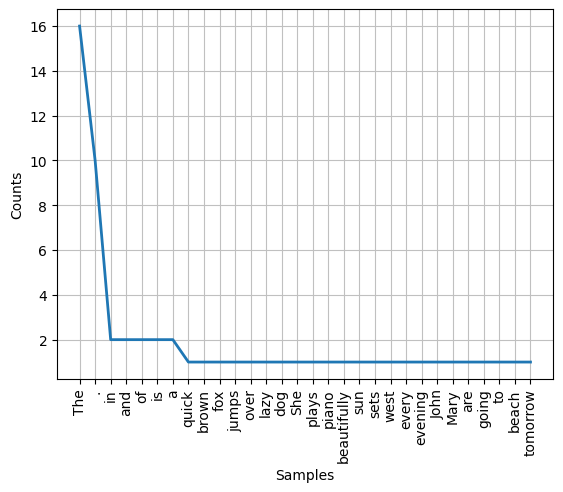

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
tokens = word_tokenize(text)
fdist = FreqDist(tokens)
freq_table = fdist.tabulate()
# Display frequency distribution as a bar graph
fdist.plot(30, cumulative=False)

### 5. Conclusion
In this experiment we learnt about the basic corpus analysis using NLTK and also learnt about the morphological features of a word. We also learnt about the tokenizination of a text file and performing frequency distribution on the tokens.